### SVC implementation and hyperparameter tuning_wine dataset

#### dataset: https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv

In [58]:
#importing the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stat
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
# To display maximum columns of dataframe on screen
pd.pandas.set_option('display.max_columns', None)

#### Read the dataset

In [52]:
data=pd.read_csv("https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv")

In [6]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [7]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

#### Basic Info

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [11]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

#### Checking Mean, Median, Mode, Std dev. etc

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


#### Checking the distribution of the features

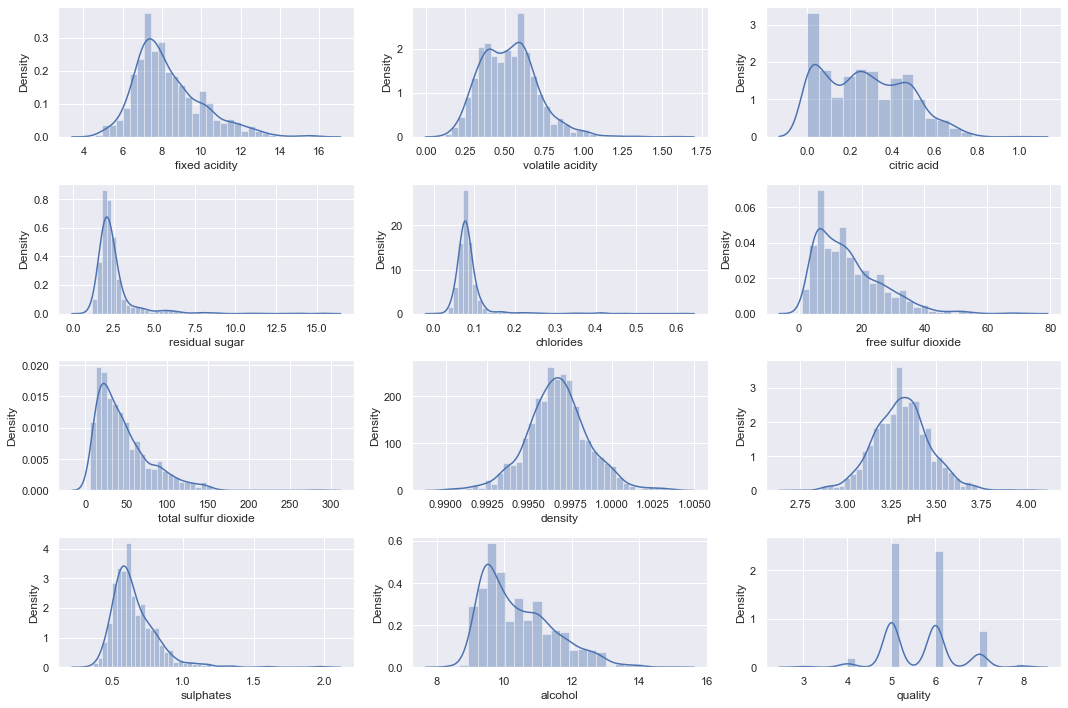

In [68]:
sns.set(rc={'figure.figsize':(15,10)})
pn=1
for features in data:
    plt.subplot(4,3,pn)
    sns.distplot(data[features],kde=True,color='b')
    pn+=1
    plt.xlabel(features)
    plt.tight_layout()

#### Checking the outliers in various features

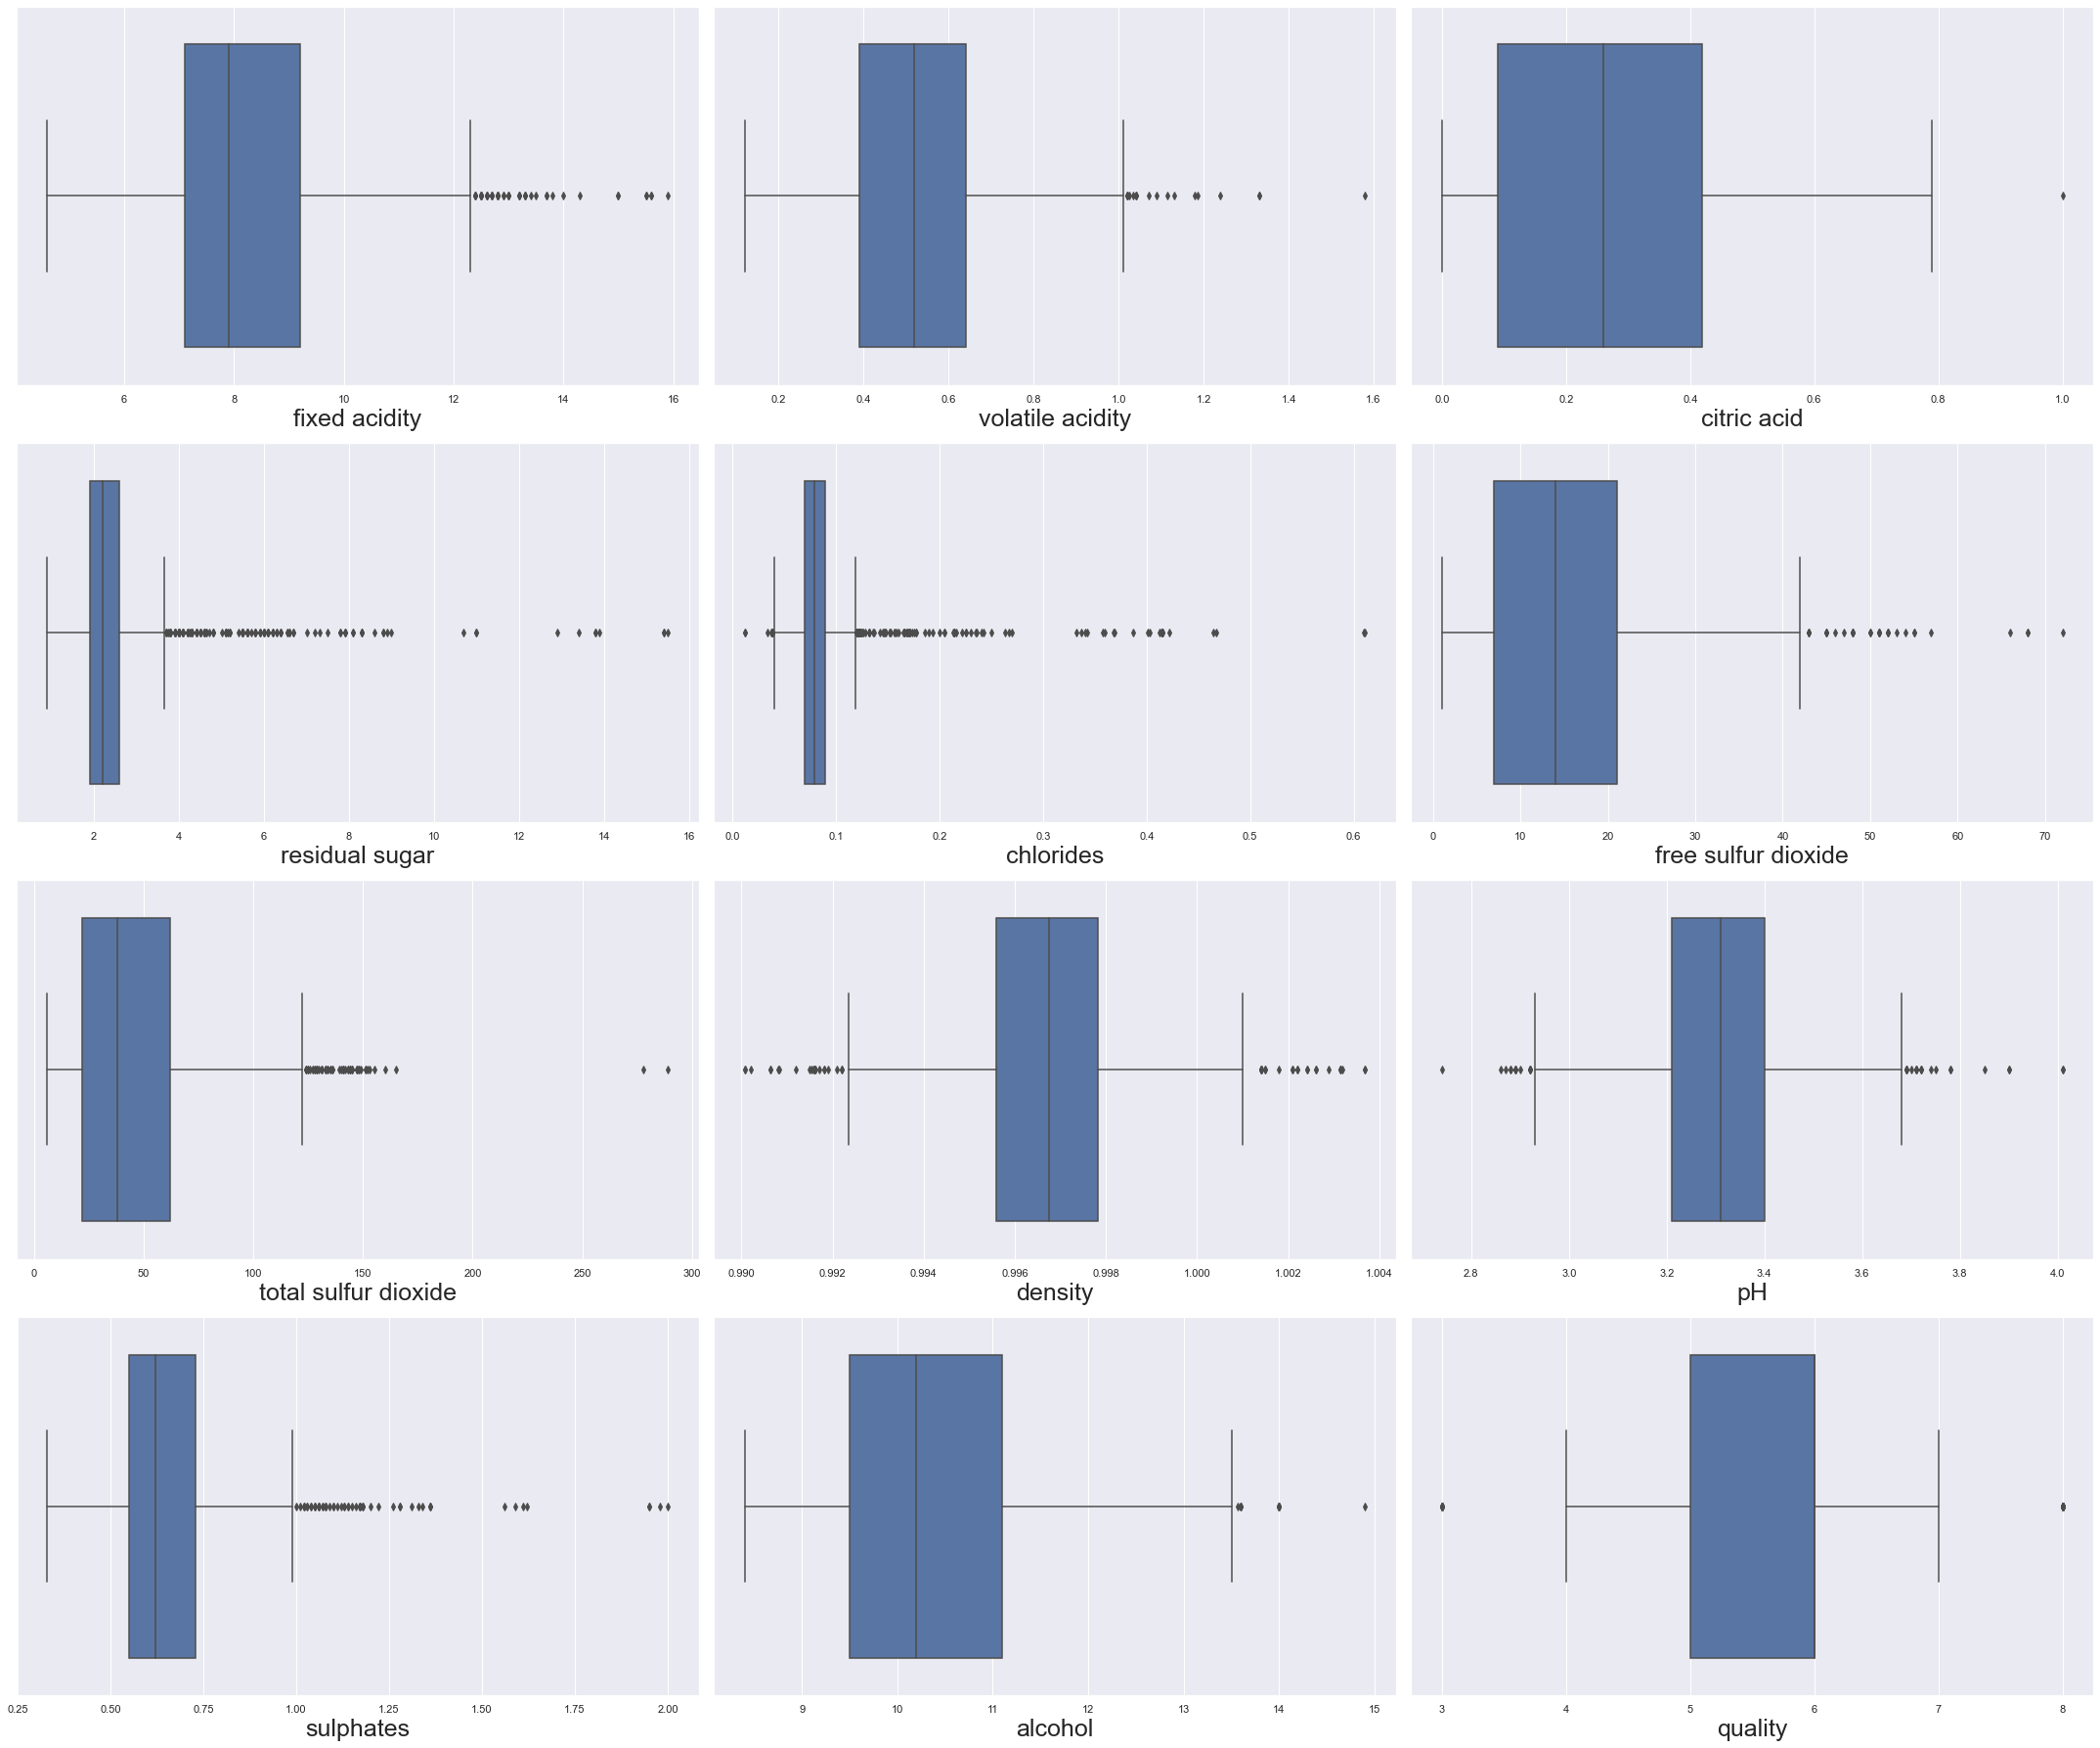

In [72]:
sns.set(rc={'figure.figsize':(30,25)})
pn=1
for features in data:
    plt.subplot(4,3,pn)
    sns.boxplot(x=features,data=data,color='b')
    pn+=1
    plt.xlabel(features,fontsize=25)
    plt.tight_layout()

#### From the above boxplot it is evident that lota of features contain outliers. We'll try treat the outliers using IQR method

#### Checking outlier for 'fixed acidity'

In [89]:
def outlier_handling(feature):
    q1=data[feature].quantile(0.25)
    q3=data[feature].quantile(0.75)
    IQR=q3-q1
    lower_fence=q1-1.5*IQR
    upper_fence=q3+1.5*IQR
    outlier_values=list(data[(data[feature]>upper_fence)].index)
    data.drop(outlier_values,inplace=True)
    return 'outliers removed'

In [90]:
outlier_handling('fixed acidity')

'outliers removed'

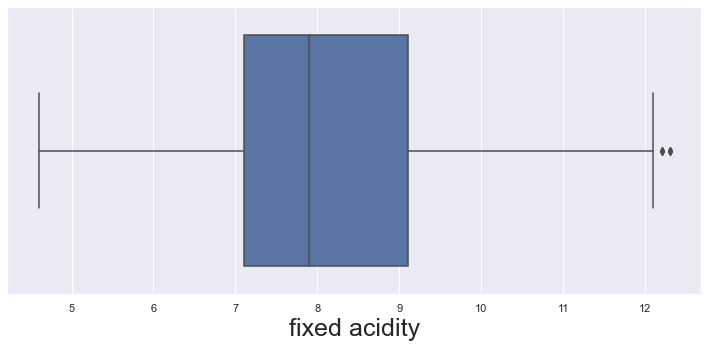

In [111]:
plt.figure(figsize=(10,5))
sns.boxplot(x='fixed acidity',data=data,color='b')
plt.xlabel('fixed acidity',fontsize=25)
plt.tight_layout()

#### Checking outlier for 'volatile acidity'

In [97]:
def outlier_handling(feature):
    q1=data[feature].quantile(0.25)
    q3=data[feature].quantile(0.75)
    IQR=q3-q1
    lower_fence=q1-1.5*IQR
    upper_fence=q3+1.5*IQR
    outlier_values=list(data[(data[feature]>upper_fence)].index)
    data.drop(outlier_values,inplace=True)
    return 'outliers removed'

In [98]:
outlier_handling('volatile acidity')

'outliers removed'

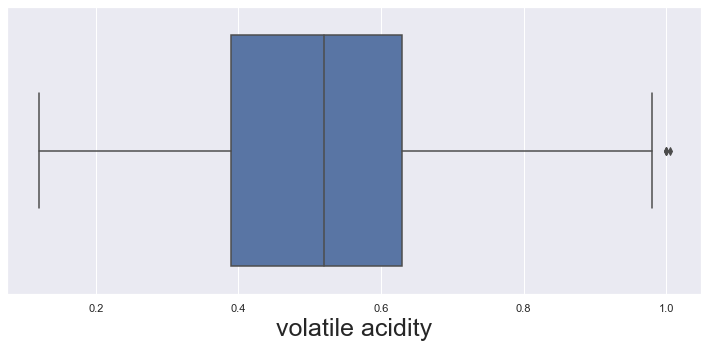

In [110]:
plt.figure(figsize=(10,5))
sns.boxplot(x='volatile acidity',data=data,color='b')
plt.xlabel('volatile acidity',fontsize=25)
plt.tight_layout()

#### Checking outlier for 'residual sugar'

In [102]:
def outlier_handling(feature):
    q1=data[feature].quantile(0.25)
    q3=data[feature].quantile(0.75)
    IQR=q3-q1
    lower_fence=q1-1.5*IQR
    upper_fence=q3+1.5*IQR
    outlier_values=list(data[(data[feature]>upper_fence)].index)
    data.drop(outlier_values,inplace=True)
    return 'outliers removed'

In [103]:
outlier_handling('residual sugar')

'outliers removed'

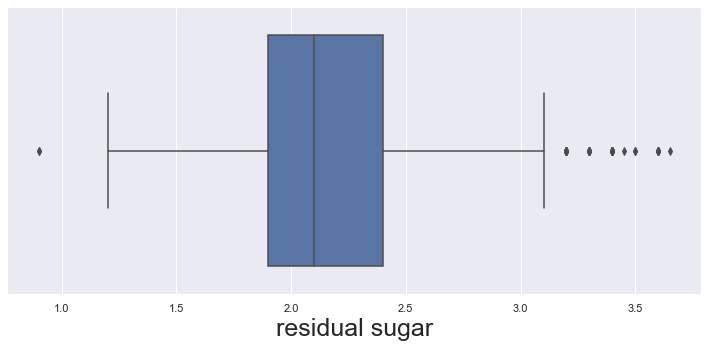

In [112]:
plt.figure(figsize=(10,5))
sns.boxplot(x='residual sugar',data=data,color='b')
plt.xlabel('residual sugar',fontsize=25)
plt.tight_layout()

#### Checking outlier for 'chlorides'

In [144]:
def outlier_handling(feature):
    q1=data[feature].quantile(0.25)
    q3=data[feature].quantile(0.75)
    IQR=q3-q1
    lower_fence=q1-1.5*IQR
    upper_fence=q3+1.5*IQR
    outlier_values=list(data[(data[feature]>upper_fence) | (data[feature]<lower_fence)].index)
    data.drop(outlier_values,inplace=True)
    return 'outliers removed'

In [145]:
outlier_handling('chlorides')

'outliers removed'

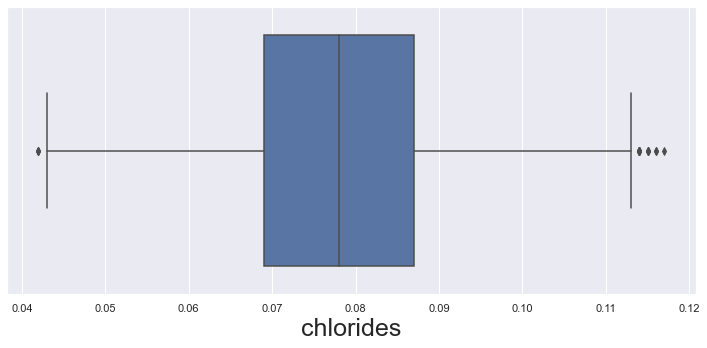

In [146]:
plt.figure(figsize=(10,5))
sns.boxplot(x='chlorides',data=data,color='b')
plt.xlabel('chlorides',fontsize=25)
plt.tight_layout()

#### Checking outlier for 'total sulfur dioxide'

In [147]:
def outlier_handling(feature):
    q1=data[feature].quantile(0.25)
    q3=data[feature].quantile(0.75)
    IQR=q3-q1
    lower_fence=q1-1.5*IQR
    upper_fence=q3+1.5*IQR
    outlier_values=list(data[(data[feature]>upper_fence) | (data[feature]<lower_fence)].index)
    data.drop(outlier_values,inplace=True)
    return 'outliers removed'

In [148]:
outlier_handling('total sulfur dioxide')

'outliers removed'

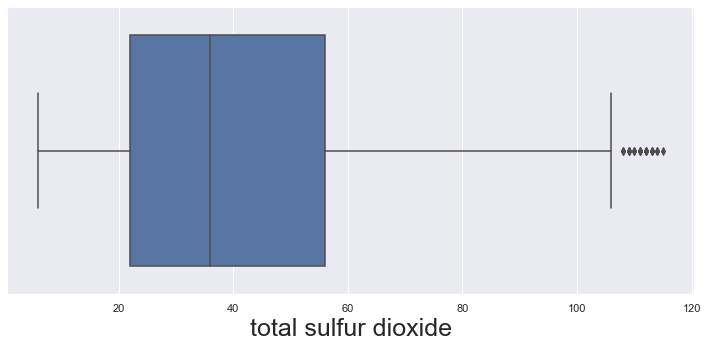

In [149]:
plt.figure(figsize=(10,5))
sns.boxplot(x='total sulfur dioxide',data=data,color='b')
plt.xlabel('total sulfur dioxide',fontsize=25)
plt.tight_layout()

#### Checking outlier for 'free sulfur dioxide'

In [150]:
def outlier_handling(feature):
    q1=data[feature].quantile(0.25)
    q3=data[feature].quantile(0.75)
    IQR=q3-q1
    lower_fence=q1-1.5*IQR
    upper_fence=q3+1.5*IQR
    outlier_values=list(data[(data[feature]>upper_fence) | (data[feature]<lower_fence)].index)
    data.drop(outlier_values,inplace=True)
    return 'outliers removed'

In [151]:
outlier_handling('free sulfur dioxide')

'outliers removed'

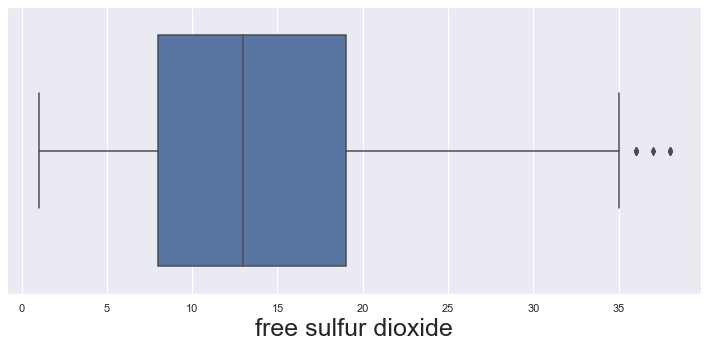

In [152]:
plt.figure(figsize=(10,5))
sns.boxplot(x='free sulfur dioxide',data=data,color='b')
plt.xlabel('free sulfur dioxide',fontsize=25)
plt.tight_layout()

#### Checking outlier for 'density'

In [153]:
def outlier_handling(feature):
    q1=data[feature].quantile(0.25)
    q3=data[feature].quantile(0.75)
    IQR=q3-q1
    lower_fence=q1-1.5*IQR
    upper_fence=q3+1.5*IQR
    outlier_values=list(data[(data[feature]>upper_fence) | (data[feature]<lower_fence)].index)
    data.drop(outlier_values,inplace=True)
    return 'outliers removed'

In [155]:
outlier_handling('density')

'outliers removed'

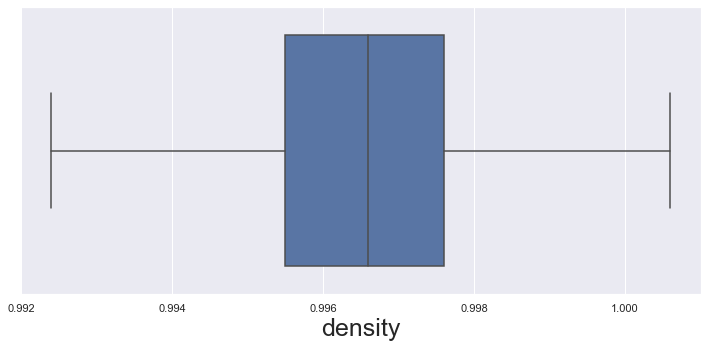

In [156]:
plt.figure(figsize=(10,5))
sns.boxplot(x='density',data=data,color='b')
plt.xlabel('density',fontsize=25)
plt.tight_layout()

#### Checking outlier for 'pH'

In [157]:
def outlier_handling(feature):
    q1=data[feature].quantile(0.25)
    q3=data[feature].quantile(0.75)
    IQR=q3-q1
    lower_fence=q1-1.5*IQR
    upper_fence=q3+1.5*IQR
    outlier_values=list(data[(data[feature]>upper_fence) | (data[feature]<lower_fence)].index)
    data.drop(outlier_values,inplace=True)
    return 'outliers removed'

In [158]:
outlier_handling('pH')

'outliers removed'

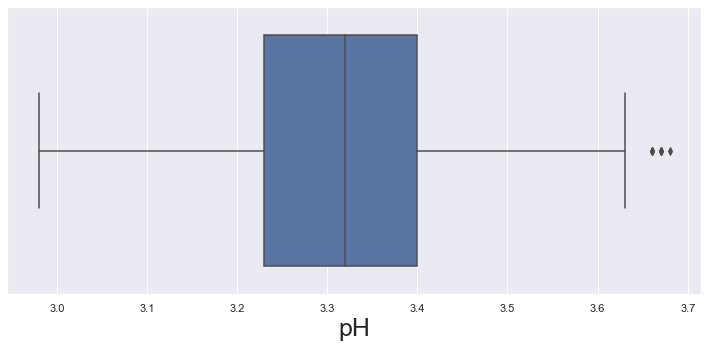

In [159]:
plt.figure(figsize=(10,5))
sns.boxplot(x='pH',data=data,color='b')
plt.xlabel('pH',fontsize=25)
plt.tight_layout()

#### Checking outlier for 'sulphates'

In [160]:
def outlier_handling(feature):
    q1=data[feature].quantile(0.25)
    q3=data[feature].quantile(0.75)
    IQR=q3-q1
    lower_fence=q1-1.5*IQR
    upper_fence=q3+1.5*IQR
    outlier_values=list(data[(data[feature]>upper_fence) | (data[feature]<lower_fence)].index)
    data.drop(outlier_values,inplace=True)
    return 'outliers removed'

In [161]:
outlier_handling('sulphates')

'outliers removed'

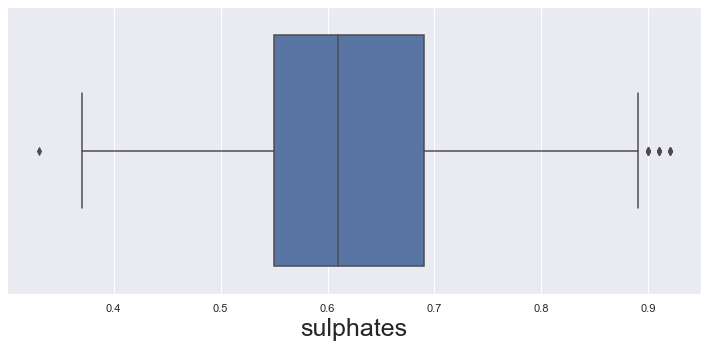

In [162]:
plt.figure(figsize=(10,5))
sns.boxplot(x='sulphates',data=data,color='b')
plt.xlabel('sulphates',fontsize=25)
plt.tight_layout()

In [100]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

#### Checking the outliers again using boxplot

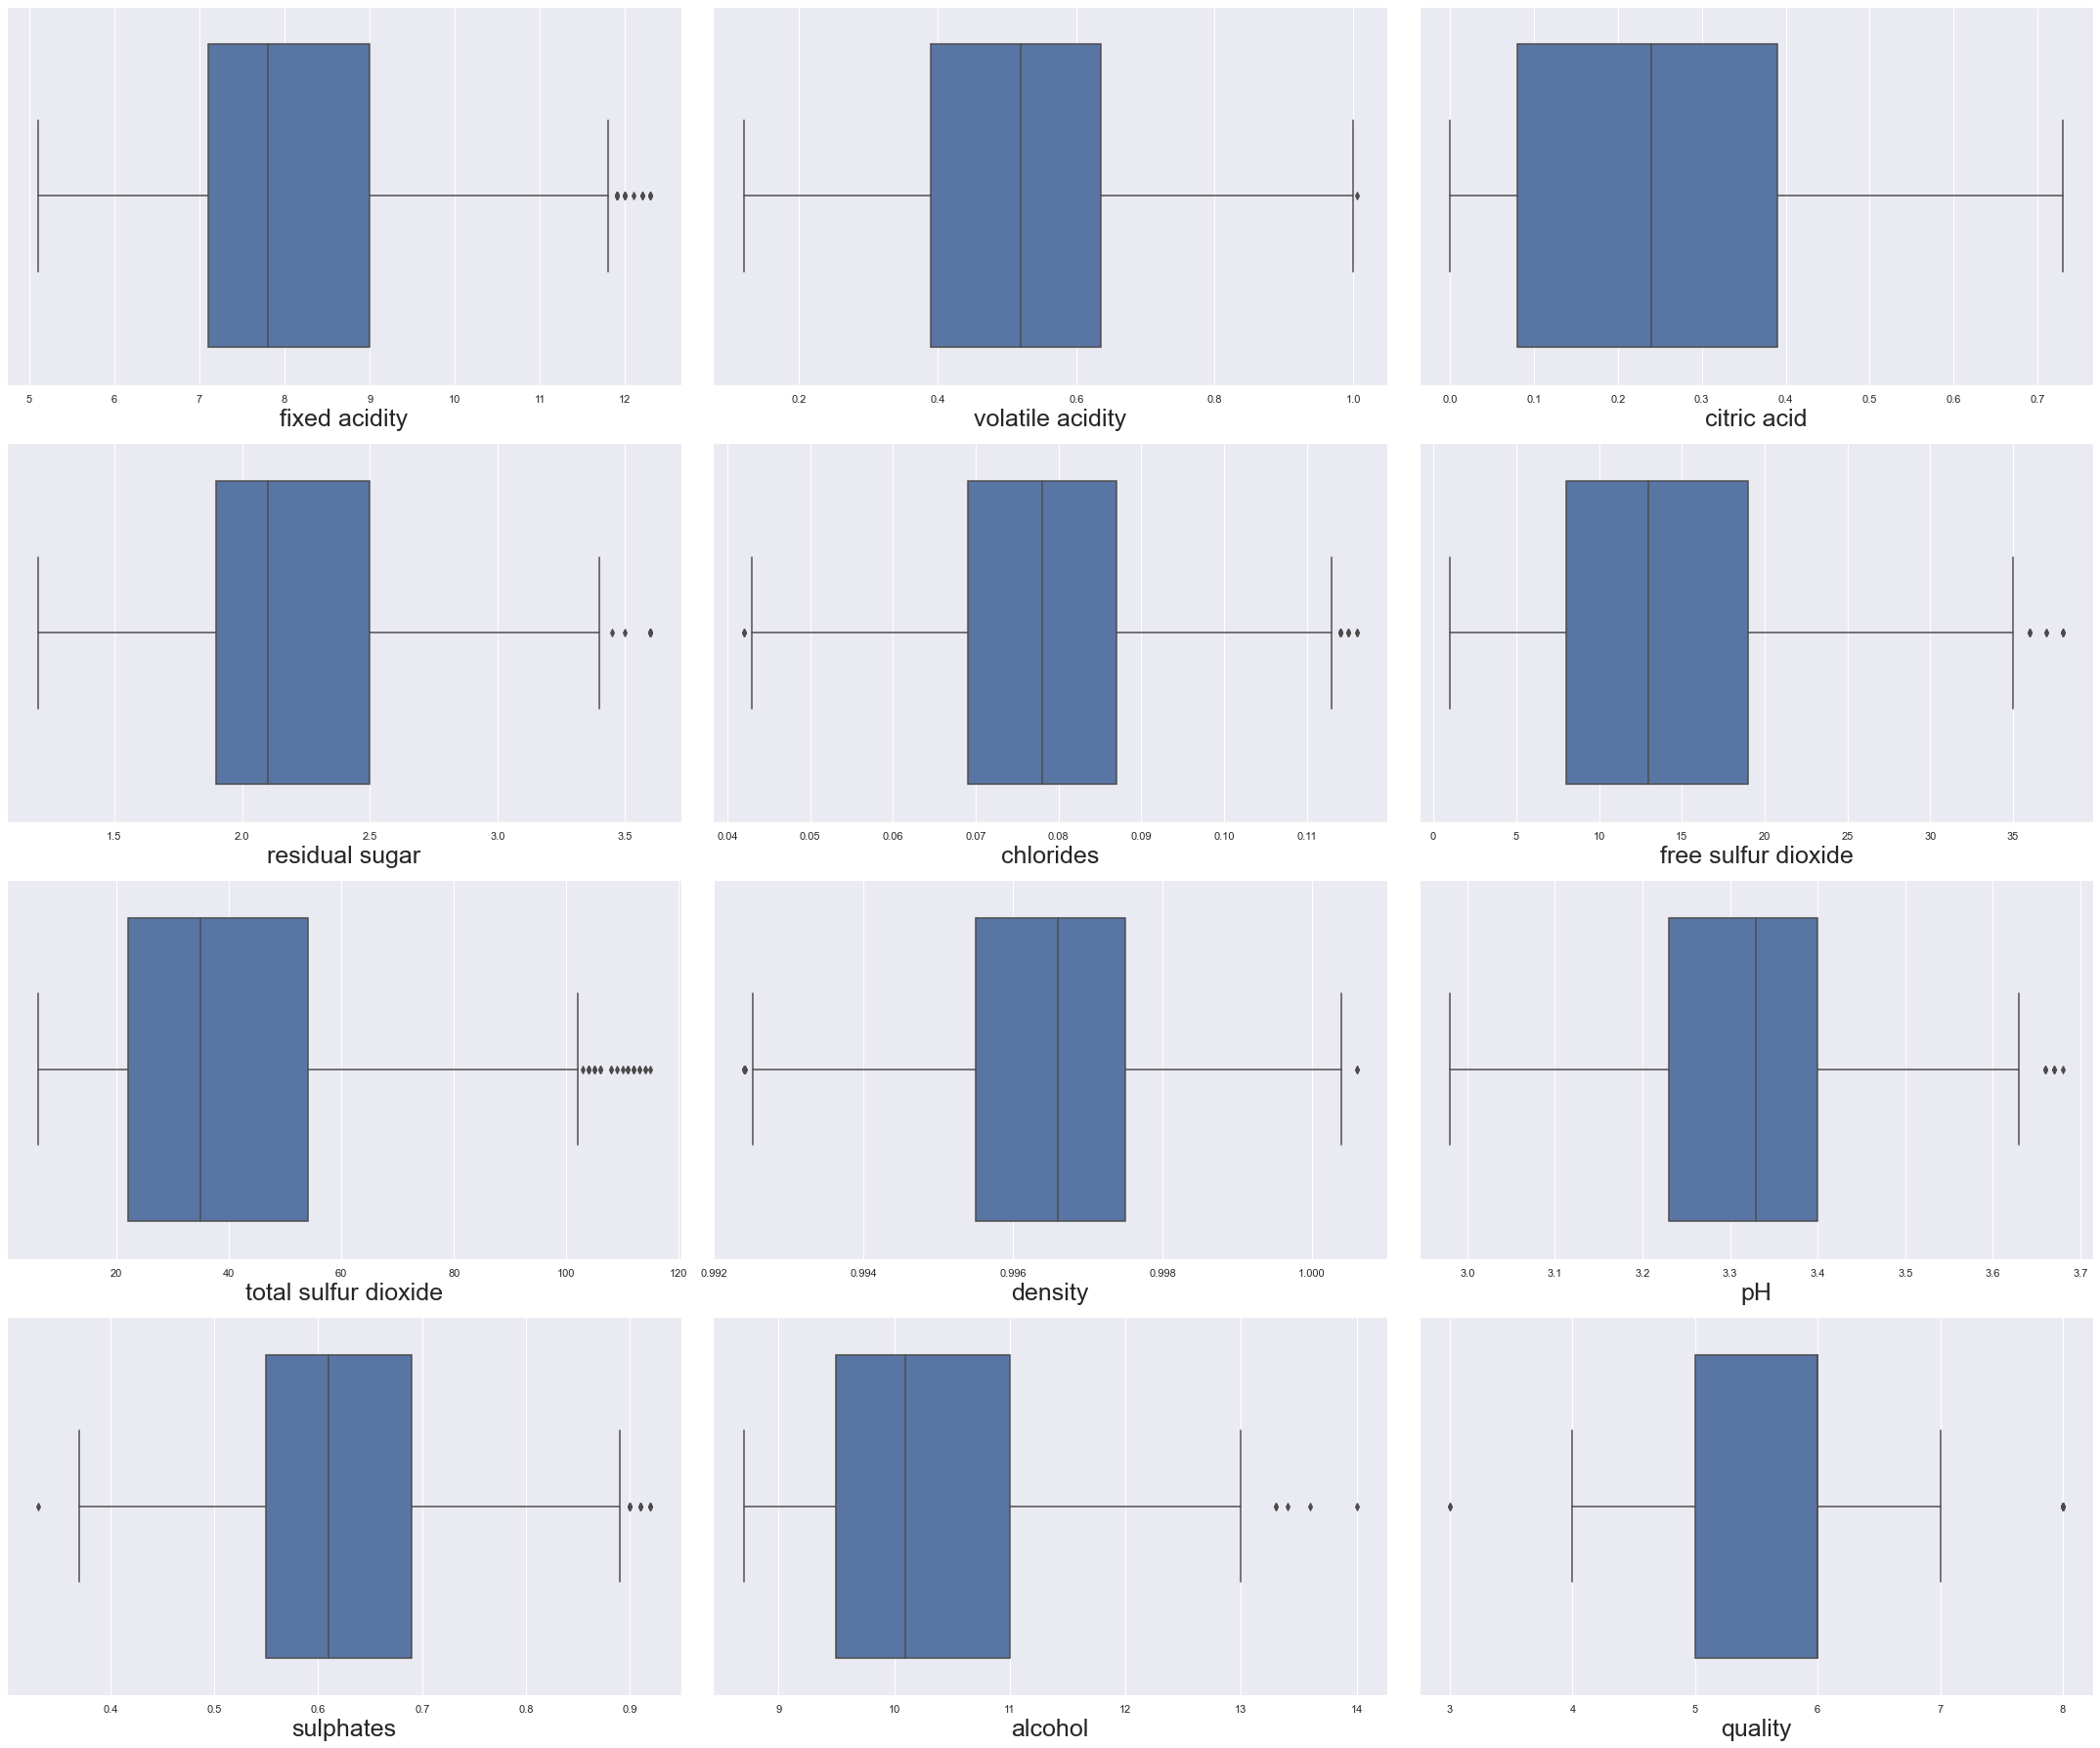

In [163]:
sns.set(rc={'figure.figsize':(30,25)})
pn=1
for features in data:
    plt.subplot(4,3,pn)
    sns.boxplot(x=features,data=data,color='b')
    pn+=1
    plt.xlabel(features,fontsize=25)
    plt.tight_layout()

#### The results look luch better now

#### Checking duplicate date

In [165]:
data[data.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
27,7.9,0.430,0.21,1.6,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
76,8.8,0.410,0.64,2.2,0.093,9.0,42.0,0.99860,3.54,0.66,10.5,5
93,7.7,0.490,0.26,1.9,0.062,9.0,31.0,0.99660,3.39,0.64,9.6,5
102,8.1,0.545,0.18,1.9,0.080,13.0,35.0,0.99720,3.30,0.59,9.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


#### Removing duplicate data

In [166]:
data.drop(list(data[data.duplicated()].index),inplace=True)

In [167]:
data[data.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


### Model building

In [168]:
X=data.drop(columns='quality')

In [170]:
y=data['quality']
y

0       5
1       5
2       5
3       6
5       5
       ..
1592    6
1593    6
1594    5
1597    5
1598    6
Name: quality, Length: 961, dtype: int64

#### Scaling the data

In [171]:
from sklearn.preprocessing import StandardScaler
sacler=StandardScaler()

In [173]:
X_scaled=scaler.fit_transform(X)
X_scaled

array([[-0.51752103,  1.05828647, -1.3745381 , ...,  1.43435206,
        -0.60520903, -0.98747149],
       [-0.24118392,  2.13224964, -1.3745381 , ..., -0.95497819,
         0.4894068 , -0.58628347],
       [-0.24118392,  1.41627419, -1.15278444, ..., -0.49252718,
         0.21575284, -0.58628347],
       ...,
       [-1.34653236,  0.46164026, -0.93103078, ...,  0.97190105,
        -0.42277306,  0.11579555],
       [-1.55378519,  0.73013105, -0.70927712, ...,  1.89680308,
         0.76306076, -0.18509546],
       [-1.48470091, -1.26863375,  1.23106741, ...,  0.50945003,
         0.30697083,  0.61728057]])

#### Splitting the test, train data

In [174]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_scaled, y,test_size=0.33, random_state=50)

In [176]:
print(X_train.shape,y_train.shape) 

(643, 11) (643,)


In [177]:
from sklearn.svm import SVC
svc=SVC()

In [178]:
svc.fit(X_train,y_train)

SVC()

In [179]:
svc_predict=svc.predict(X_test)

#### Checking the accuracy of the model

In [181]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,svc_predict)

0.5911949685534591

#### Improving the acciracy by Grid Search

In [184]:
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
grid=GridSearchCV(SVC(),parameters)
grid.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

In [185]:
grid.best_score_

0.6158187984496124